# Tablero de Galton - Tarea 2

(c) Thanos Drossos 

18.02.2025

Este código simula el famoso experimento del Tablero de Galton y compara los resultados de la simulación con la distribución binomial teórica esperada.

### ¿Qué hace el código?

1.  **Simulación del Tablero de Galton:**
    *   La función `galton_board_simulation(R, p_right, num_levels)` simula el proceso de dejar caer `R` balines a través de un tablero de Galton que tiene `num_levels` filas de clavos.
    *   En cada nivel, un balín tiene una probabilidad `p_right` de caer hacia la derecha y `1 - p_right` de caer hacia la izquierda.
    *   La función retorna una lista que representa la distribución de los balines en las posibles posiciones finales en la parte inferior del tablero.

2.  **Cálculo de la Distribución Binomial Esperada:**
    *   La función `binomial_expected_distribution(R, p_right, num_levels)` calcula la distribución binomial teórica que se espera observar en un Tablero de Galton ideal.
    *   Utiliza la fórmula de la probabilidad binomial para calcular la probabilidad de que un balín termine en cada posición final posible.
    *   Retorna una lista de los conteos esperados de balines en cada posición final.

3.  **Comparación y Visualización:**
    *   El código principal define los parámetros del experimento: número de balines (`R`), probabilidad de ir a la derecha (`p_right`) y número de niveles (`num_levels`).
    *   Llama a las funciones de simulación y cálculo teórico.
    *   Imprime los resultados de la simulación.
    *   Genera un gráfico de barras que muestra la distribución de los resultados de la simulación y una línea que representa la distribución binomial esperada, permitiendo una comparación visual entre ambos.

### Cómo funciona?

*   **Simulación:** La simulación se basa en la generación de números aleatorios para determinar la trayectoria de cada balín a través del tablero. La posición final de cada balín se incrementa dependiendo de si el número aleatorio generado es menor que `p_right`.
*   **Distribución Binomial:** La distribución binomial se calcula utilizando la función `math.comb` para obtener los coeficientes binomiales y la fórmula de la probabilidad binomial.
*   **Visualización:** La biblioteca `matplotlib.pyplot` se utiliza para crear un gráfico de barras y una línea que representan las distribuciones simuladas y teóricas, respectivamente.

Resultados de la simulación con 10000 balines:
  Posición final 0: 137 balines
  Posición final 1: 940 balines
  Posición final 2: 2341 balines
  Posición final 3: 3182 balines
  Posición final 4: 2311 balines
  Posición final 5: 951 balines
  Posición final 6: 138 balines


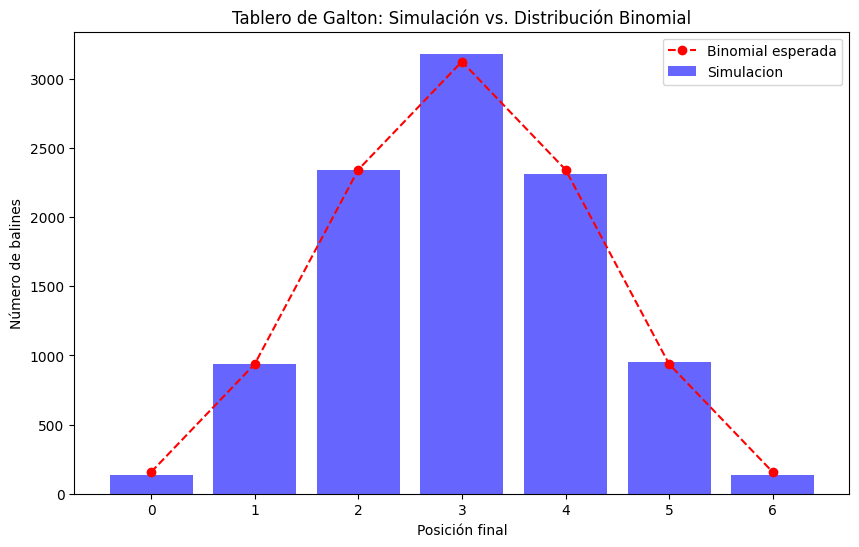

In [1]:
import random
import math
import matplotlib.pyplot as plt

def galton_board_simulation(R, p_right=0.5, num_levels=6):
    """
    Simula la caída de R balines a través de un tablero de Galton con 'num_levels' niveles,
    resultando en (num_levels + 1) posibles posiciones finales.
    
    Parámetros:
    -----------
    R : int
        Número de balines a soltar.
    p_right : float
        Probabilidad de que el balín vaya a la derecha en cada paso (0 <= p_right <= 1).
    num_levels : int
        Número de filas (o niveles) en el tablero. El número de estados finales es num_levels + 1.

    Returns:
    --------
    distribution : list
        Lista de longitud (num_levels + 1) con las frecuencias de balines en cada posición final.
    """
    distribution = [0] * (num_levels + 1)  # Contadores para cada posición final

    for _ in range(R):
        position = 0
        for _ in range(num_levels):
            # Generamos un número aleatorio en [0, 1)
            rnd = random.random()
            # Si rnd < p_right, cae a la derecha
            if rnd < p_right:
                position += 1
        distribution[position] += 1

    return distribution

def binomial_expected_distribution(R, p_right, num_levels):
    """
    Calcula la distribución binomial esperada (en términos de conteos esperados),
    para compararla con los resultados de la simulación.

    P(X = k) = C(num_levels, k) * (p_right^k) * ((1 - p_right)^(num_levels - k))
    Retorna una lista de tamaño (num_levels + 1) con los conteos esperados.
    """
    expected_counts = []
    for k in range(num_levels + 1):
        prob_k = math.comb(num_levels, k) * (p_right**k) * ((1 - p_right)**(num_levels - k))
        expected_counts.append(R * prob_k)
    return expected_counts

# Parámetros
R = 10000         # Número de balines
p_right = 0.5     # Probabilidad de ir a la derecha
num_levels = 6    # Número de niveles en el tablero (=21 obstaculos)

# Simulación
results = galton_board_simulation(R, p_right, num_levels)

# Distribución binomial teórica
expected_counts = binomial_expected_distribution(R, p_right, num_levels)

# Imprimir resultados de la simulación
print(f"Resultados de la simulación con {R} balines:")
for pos, count in enumerate(results):
    print(f"  Posición final {pos}: {count} balines")

# Graficar
plt.figure(figsize=(10, 6))
# Barras con la distribución de la simulación
plt.bar(range(num_levels + 1), results, color='blue', alpha=0.6, label='Simulacion')
# Línea con la distribución binomial esperada
plt.plot(range(num_levels + 1), expected_counts, 'o--r', label='Binomial esperada')

plt.title("Tablero de Galton: Simulación vs. Distribución Binomial")
plt.xlabel("Posición final")
plt.ylabel("Número de balines")
plt.legend()
plt.show()
